<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [70]:
import pandas as pd

Load the dataset into a dataframe.


In [71]:
# df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")
# df.to_csv('datasets/m2_survey_data.csv', index=False)

In [72]:
df = pd.read_csv('datasets/m2_survey_data.csv')
df.head(1)

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy


In [92]:
df.shape

(11398, 85)

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


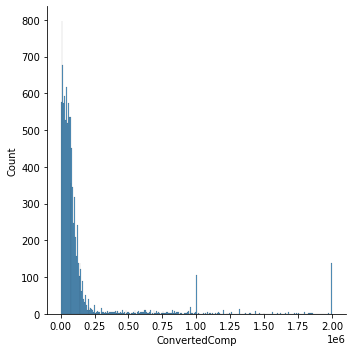

In [73]:
import seaborn as sns 
df_modified = df[df['ConvertedComp'].isna()==False]
sns.displot(data=df, x='ConvertedComp')

Plot the histogram for the column `ConvertedComp`.


<AxesSubplot:>

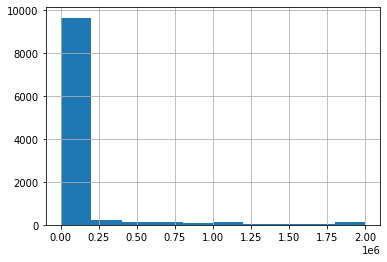

In [74]:
# your code goes here
df['ConvertedComp'].hist()

What is the median of the column `ConvertedComp`?


In [75]:
# your code goes here
df['ConvertedComp'].median()

57745.0

How many responders identified themselves only as a **Man**?


In [76]:
# your code goes here
df['Gender'].value_counts()

Gender
Man                                                            10480
Woman                                                            731
Non-binary, genderqueer, or gender non-conforming                 63
Man;Non-binary, genderqueer, or gender non-conforming             26
Woman;Non-binary, genderqueer, or gender non-conforming           14
Woman;Man                                                          9
Woman;Man;Non-binary, genderqueer, or gender non-conforming        2
Name: count, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [77]:
# your code goes here
df[df['Gender']=='Woman']['ConvertedComp'].median()

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [78]:
# your code goes here
df['Age'].describe()

count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


<AxesSubplot:xlabel='Age', ylabel='Count'>

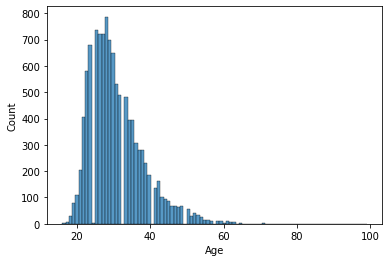

In [79]:
sns.histplot(data=df, x='Age')

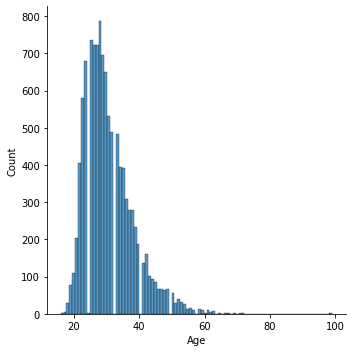

In [80]:
sns.displot(data=df, x='Age')

<AxesSubplot:>

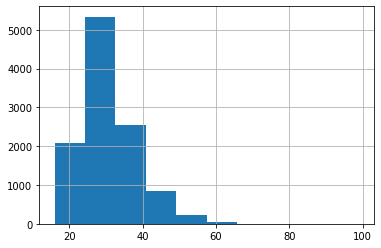

In [81]:
import numpy as np 
df.Age.hist(bins=10)

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


57745.0

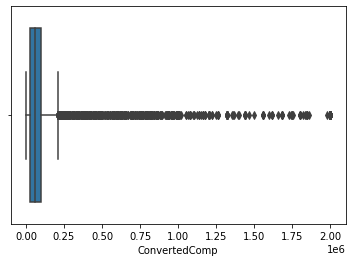

In [82]:
# your code goes here
sns.boxplot(data=df, x='ConvertedComp')
df['ConvertedComp'].median()

<AxesSubplot:>

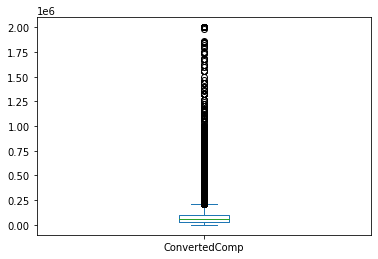

In [83]:
df['ConvertedComp'].plot(kind='box')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [84]:
# your code goes here
df['ConvertedComp'].quantile([0.25, 0.75])
iqr = df['ConvertedComp'].quantile(0.75) - df['ConvertedComp'].quantile(0.25)
iqr

73132.0

Find out the upper and lower bounds.


In [85]:
# your code goes here
lower_bound = df['ConvertedComp'].quantile(0.25) - 1.5*iqr
upper_bound = df['ConvertedComp'].quantile(0.75) + 1.5*iqr
print(lower_bound, upper_bound)

-82830.0 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [86]:
# your code goes here
len(df[(df['ConvertedComp'] < 0) | (df['ConvertedComp'] > upper_bound)])

879

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


<AxesSubplot:ylabel='Frequency'>

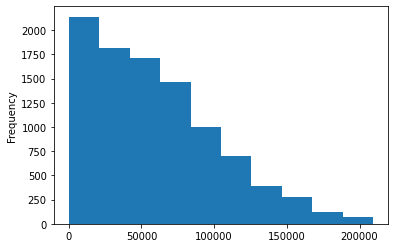

In [87]:
# your code goes here
df_new = df[(df['ConvertedComp']>= 0) & (df['ConvertedComp']<=upper_bound)]
df_new['ConvertedComp'].plot(kind='hist')

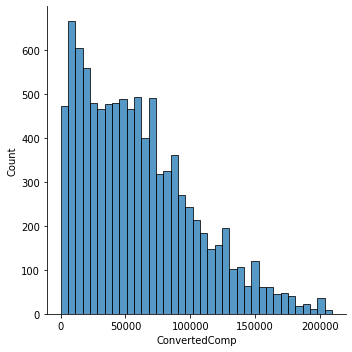

In [88]:
sns.displot(data=df_new, x='ConvertedComp')

In [89]:
df_new['ConvertedComp'].agg(['mean', 'median'])

mean      59883.208389
median    52704.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [90]:
num_cols = df_new.select_dtypes(include=np.number).columns.tolist()
for num_col in num_cols:
    print(f'{num_col}: {df_new["Age"].corr(df_new[num_col])}')

Respondent: 0.002180177911011847
CompTotal: 0.006336555779827535
ConvertedComp: 0.40182139971221736
WorkWeekHrs: 0.032031815904989415
CodeRevHrs: -0.012877695845513702
Age: 1.0


In [91]:
# another way
corr_matrix = df_new.select_dtypes(include=np.number).corr()
corr_matrix['Age']

Respondent       0.002180
CompTotal        0.006337
ConvertedComp    0.401821
WorkWeekHrs      0.032032
CodeRevHrs      -0.012878
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
